In [1]:
!pip3 install ultralytics --verbose

Using pip 23.2.1 from /Users/hassan/Documents/Hackathon/venv/lib/python3.11/site-packages/pip (python 3.11)

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [12]:
from ultralytics import YOLO
import cv2
import os

# Load YOLO model
model = YOLO("yolov8n.pt")  # Ensure you have the correct YOLOv8 model

# Input video path
input_video_path = "hockey_test.mp4"
cap = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Output folder for cropped videos
output_folder = "cropped_players"
os.makedirs(output_folder, exist_ok=True)

# Video writers for each player (dictionary of player_id -> VideoWriter)
player_video_writers = {}

# Initialize frame counter
frame_counter = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or cannot read frame.")
        break

    # Run YOLO detection
    results = model(frame)  # YOLOv8 returns a list of Results objects

    # # Check if any detections exist
    # print("=============================")
    # if not results[0].boxes:
    #     print(f"No detections in frame {frame_counter}")
    # else:
    #     print(f"Detections in frame {frame_counter}:")
    #     for box in results[0].boxes:
    #         print(box.xyxy, box.conf, box.cls)

    # Iterate through detected objects
    for box in results[0].boxes:  # Access boxes from the first Results object
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Extract bounding box coordinates
    
        conf = box.conf[0]  # Confidence score
        cls = int(box.cls[0])  # Class ID
        # print(f"Detected class ID: {cls}")

        if cls != 0:  # Assuming "person" class ID is 0
            continue

        # Crop the player region from the frame
        player_crop = frame[y1:y2, x1:x2]

        # Create a unique ID for each player based on bounding box (basic example, can improve with tracking)
        player_id = f"player_{x1}_{y1}_{x2}_{y2}"

        # Create a VideoWriter for the player if it doesn't exist
        if player_id not in player_video_writers:
            player_output_path = os.path.join(output_folder, f"{player_id}.mp4")
            height, width = player_crop.shape[:2]
            # print("SSSS+++++", height, width)
            player_video_writers[player_id] = cv2.VideoWriter(
                player_output_path,
                cv2.VideoWriter_fourcc(*'mp4v'),
                fps,
                (width, height)
            )
            print(f"Initializing VideoWriter for {player_id} with size {player_crop.shape[1]}x{player_crop.shape[0]}")
            print(f"FPS: {fps}, Codec: mp4v")

        # Write the cropped frame to the player's video
        player_video_writers[player_id].write(player_crop)

    frame_counter += 1
    print(f"Processed frame {frame_counter}")

# Release resources
cap.release()
for writer in player_video_writers.values():
    print("HHHH^^^^", writer)
    writer.release()

print(f"Videos for players saved in: {output_folder}")


0: 384x640 11 persons, 97.1ms
Speed: 1.4ms preprocess, 97.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
Initializing VideoWriter for player_251_306_301_399 with size 50x93
FPS: 30, Codec: mp4v
Initializing VideoWriter for player_440_236_483_331 with size 43x95
FPS: 30, Codec: mp4v
Initializing VideoWriter for player_133_355_203_458 with size 70x103
FPS: 30, Codec: mp4v
Initializing VideoWriter for player_102_485_176_576 with size 74x91
FPS: 30, Codec: mp4v
Initializing VideoWriter for player_388_413_492_556 with size 104x143
FPS: 30, Codec: mp4v
Initializing VideoWriter for player_700_533_754_674 with size 54x141
FPS: 30, Codec: mp4v
Initializing VideoWriter for player_936_483_979_611 with size 43x128
FPS: 30, Codec: mp4v
Initializing VideoWriter for player_1011_455_1061_584 with size 50x129
FPS: 30, Codec: mp4v
Initializing VideoWriter for player_449_349_516_436 with size 67x87
FPS: 30, Codec: mp4v
Initializing VideoWriter for player_882_511_920_634 with size 3

KeyboardInterrupt: 

In [166]:
stub_path = '../football_analysis/stubs/track_stub5.pkl'

In [202]:
import os
import pickle

if stub_path is not None and os.path.exists(stub_path):
    with open(stub_path,'rb') as f:
        data = pickle.load(f)
        tracks = data['tracks']
        keypoints = data['keypoints']


In [203]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [204]:
persons = tracks['persons']
len(persons)

419

In [205]:
type(keypoints[0].data)


torch.Tensor

In [206]:
len(keypoints[2].data)

3

In [207]:
import torch

def calculate_body_center(keypoints):
    """
    Calculate the center of the body using the left and right shoulders and waists.
    :param keypoints: Tensor of shape (N, 3) where each row represents [x, y, confidence].
    :return: Tuple (x_center, y_center) representing the body center.
    """
    # Indices for left shoulder, right shoulder, left waist (hip), right waist (hip)
    indices = [5, 6, 11, 12]

    # Extract the relevant keypoints
    selected_keypoints = keypoints[indices]

    # Filter out keypoints with low confidence (< 0.5)
    valid_keypoints = selected_keypoints[selected_keypoints[:, 2] > 0.5]

    if valid_keypoints.shape[0] == 0:
        # If no valid keypoints, return None
        return None

    # Calculate the center as the mean of valid keypoints
    x_center = valid_keypoints[:, 0].mean()
    y_center = valid_keypoints[:, 1].mean()

    return (x_center, y_center)


In [208]:
def get_center_of_bbox(bbox):
    x1,y1,x2,y2 = bbox
    return int((x1+x2)/2),int((y1+y2)/2)

In [209]:
for i in range(419):
    if 11 in persons[i]:
        print(i, persons[i][11])


81 {'bbox': [1649.0, 354.0, 1733.0, 595.0]}
82 {'bbox': [1640.0, 356.0, 1725.0, 595.0]}
84 {'bbox': [1627.0, 358.0, 1704.0, 596.0]}
85 {'bbox': [1619.0, 359.0, 1697.0, 593.0]}
87 {'bbox': [1601.0, 359.0, 1684.0, 596.0]}
88 {'bbox': [1596.0, 358.0, 1677.0, 596.0]}
90 {'bbox': [1579.0, 362.0, 1661.0, 597.0]}
91 {'bbox': [1573.0, 364.0, 1655.0, 598.0]}
93 {'bbox': [1555.0, 361.0, 1640.0, 599.0]}
94 {'bbox': [1548.0, 364.0, 1632.0, 600.0]}
96 {'bbox': [1536.0, 374.0, 1617.0, 598.0]}
97 {'bbox': [1528.0, 369.0, 1608.0, 598.0]}
98 {'bbox': [1520.0, 371.0, 1602.0, 601.0]}
100 {'bbox': [1503.0, 370.0, 1589.0, 600.0]}
101 {'bbox': [1499.0, 368.0, 1581.0, 600.0]}
102 {'bbox': [1491.0, 372.0, 1574.0, 601.0]}
103 {'bbox': [1485.0, 373.0, 1566.0, 602.0]}
104 {'bbox': [1479.0, 373.0, 1560.0, 602.0]}
105 {'bbox': [1474.0, 370.0, 1551.0, 601.0]}
106 {'bbox': [1465.0, 370.0, 1548.0, 603.0]}
107 {'bbox': [1455.0, 372.0, 1538.0, 602.0]}
108 {'bbox': [1451.0, 374.0, 1530.0, 602.0]}
109 {'bbox': [1445.0, 3

In [210]:
for i in range(len(keypoints[0].data)):
    print(calculate_body_center(keypoints[0].data[i]))
    print(get_center_of_bbox(persons[0][i+1]['bbox']))
    print("==================================")

(tensor(21.9497), tensor(442.2049))
(54, 503)
(tensor(910.2355), tensor(577.7090))
(909, 620)
(tensor(213.8477), tensor(410.8964))
(225, 451)


In [291]:
def calculate_distance_between(data):
    """
    Calculates the normalized distance between the line crossing the ears (3,4) and shoulders (5,6),
    normalized by the distance between the line crossing the ears (3,4) and the feet (15,16).
    :param data: Tensor of shape (N, 3), where each row represents [x, y, confidence].
    :return: Normalized distance as a float.
    """
    # Ensure the input is valid and contains enough keypoints
    if data.shape[0] < 17:
        raise ValueError("Insufficient keypoints. Ensure the input data contains at least 17 keypoints.")

    # Extract relevant keypoints
    ear_left, ear_right = data[3, :2], data[4, :2]
    eye_left, eye_right = data[1, :2], data[2, 2]
    mouth = data[0, :2]
    shoulder_left, shoulder_right = data[5, :2], data[6, :2]
    foot_left, foot_right = data[15, :2], data[16, :2]
    hip_left, hip_right = data[11, :2], data[12, :2]

    # Calculate the midpoint of each pair of keypoints
    ear_midpoint = (ear_left + ear_right + eye_left + eye_right + mouth) / 5
    shoulder_midpoint = (shoulder_left + shoulder_right) / 2
    foot_midpoint = (foot_left + foot_right) / 2
    hip_midpoint = (hip_left + hip_right) / 2

    # Calculate distances
    ear_to_shoulder_distance = torch.norm(ear_midpoint - shoulder_midpoint)
    ear_to_hip_distance = torch.norm(ear_midpoint - hip_midpoint)



    # Normalize the distance
    if ear_to_hip_distance == 0:  # Avoid division by zero
        return 0

    normalized_distance = ear_to_shoulder_distance / ear_to_hip_distance

    return normalized_distance
    


In [292]:
players = {}
for i in range(419):
    keypoints_per_frame = keypoints[i].data
    for j in range(len(keypoints[i].data)):
        ids = list(persons[i].keys())
        if j < len(ids):
            if ids[j] in players:
                players[ids[j]].append({"frame": i, "distance": calculate_distance_between(keypoints[i].data[j])})
            else:
                players[ids[j]] = [{"frame": i, "distance": calculate_distance_between(keypoints[i].data[j])}]


In [293]:
import numpy as np

def normalize_outliers(data, id, threshold=3):
    """
    Identifies and replaces outliers in a list of dictionaries with a median value.
    
    Parameters:
        data (list): List of dictionaries, where each dictionary contains 'distance' and 'frame'.
        threshold (float): Z-score threshold to identify outliers (default is 3).
    
    Returns:
        list: Normalized data with outliers replaced by the median value.
    """
    # Extract distances
    distances = np.array([entry['distance'] for entry in data])
    
    # Calculate median and z-scores
    median_distance = np.median(distances)
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    if std_distance != 0:
        z_scores = (distances - mean_distance) / std_distance
    else:
        z_scores = 0
    
    # Identify outliers
    outliers = np.abs(z_scores) > threshold  # Boolean mask for outliers
    
    # Log each outlier
    try:
        outlier_indices = np.atleast_1d(np.where(outliers)[0])  # Ensure at least 1D
        for idx in outlier_indices:
            print(f"Outlier detected for id={id}: Frame {data[idx]['frame']}, Distance {data[idx]['distance']}")
    except e:
        print(e)

    # Replace outliers with the median
    distances[outliers] = median_distance
    
    # Update the data with normalized distances
    for i, entry in enumerate(data):
        entry['distance'] = distances[i]
    
    return data

In [294]:
players[2][10:20]

[{'frame': 11, 'distance': tensor(0.9843)},
 {'frame': 12, 'distance': tensor(0.9912)},
 {'frame': 13, 'distance': tensor(0.9854)},
 {'frame': 14, 'distance': tensor(3556.7109)},
 {'frame': 15, 'distance': tensor(0.9927)},
 {'frame': 16, 'distance': tensor(0.9962)},
 {'frame': 17, 'distance': tensor(1.0010)},
 {'frame': 18, 'distance': tensor(1.0003)},
 {'frame': 19, 'distance': tensor(0.9987)},
 {'frame': 20, 'distance': tensor(0.9985)}]

In [295]:
players[2][10:20]

[{'frame': 11, 'distance': tensor(0.9843)},
 {'frame': 12, 'distance': tensor(0.9912)},
 {'frame': 13, 'distance': tensor(0.9854)},
 {'frame': 14, 'distance': tensor(3556.7109)},
 {'frame': 15, 'distance': tensor(0.9927)},
 {'frame': 16, 'distance': tensor(0.9962)},
 {'frame': 17, 'distance': tensor(1.0010)},
 {'frame': 18, 'distance': tensor(1.0003)},
 {'frame': 19, 'distance': tensor(0.9987)},
 {'frame': 20, 'distance': tensor(0.9985)}]

In [296]:
# Normalize data
for k, id in enumerate(players):
    normalize_outliers(players[id], id, 3)


Outlier detected for id=1: Frame 7, Distance 4.194888591766357
Outlier detected for id=2: Frame 14, Distance 3556.7109375
Outlier detected for id=5: Frame 182, Distance 1.0085434913635254
Outlier detected for id=6: Frame 15, Distance 3042.96923828125
Outlier detected for id=11: Frame 132, Distance 0.9052655696868896
Outlier detected for id=13: Frame 182, Distance 0.7537975311279297
Outlier detected for id=16: Frame 227, Distance 0.8505060076713562
Outlier detected for id=25: Frame 304, Distance 1.5800650119781494
Outlier detected for id=25: Frame 305, Distance 1.5768139362335205
Outlier detected for id=25: Frame 306, Distance 1.5727839469909668
Outlier detected for id=25: Frame 307, Distance 1.5688203573226929
Outlier detected for id=27: Frame 314, Distance 0.7863091826438904


/var/folders/sk/4v2_r0yj1cldv7px2xrtdv5r0000gn/T/ipykernel_1969/620245292.py:31: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  outlier_indices = np.atleast_1d(np.where(outliers)[0])  # Ensure at least 1D


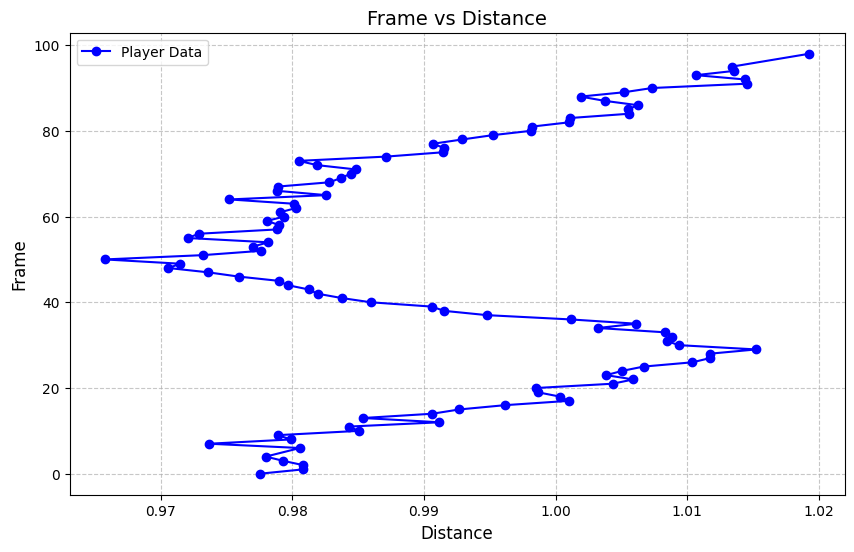

In [315]:
import matplotlib.pyplot as plt
player_data = players[2]
# Extract distances and frames
distances = [data['distance'] for data in player_data]
frames = [data['frame'] for data in player_data]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(distances, frames, marker='o', color='blue', label='Player Data')
plt.xlabel("Distance", fontsize=12)
plt.ylabel("Frame", fontsize=12)
plt.title("Frame vs Distance", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [309]:
def find_relative_extrema(distances, frames):
    """
    Identifies the relative minimums and maximums in the graph and
    returns their corresponding frame numbers.

    Parameters:
        distances (list): List of distance values.
        frames (list): List of frame numbers corresponding to the distances.

    Returns:
        tuple: (minima, maxima)
               - minima: List of tuples (frame, distance) for relative minimum points.
               - maxima: List of tuples (frame, distance) for relative maximum points.
    """
    minima = []
    maxima = []

    for i in range(1, len(distances) - 1):
        # Check for relative minimum
        if distances[i] < distances[i - 1] and distances[i] < distances[i + 1]:
            minima.append((frames[i], distances[i]))

        # Check for relative maximum
        if distances[i] > distances[i - 1] and distances[i] > distances[i + 1]:
            maxima.append((frames[i], distances[i]))

    return minima, maxima

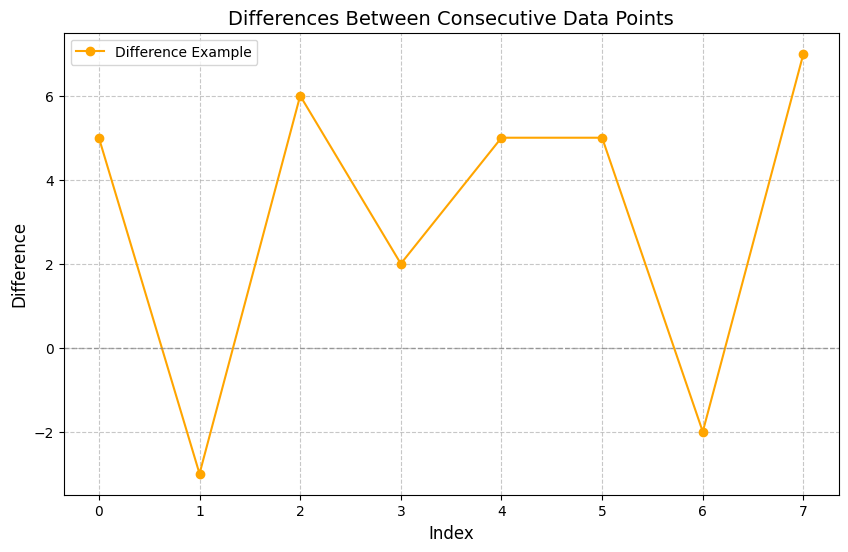

In [312]:
import matplotlib.pyplot as plt
import numpy as np

def plot_consecutive_differences(data, label="Data Differences"):
    """
    Plots the differences between consecutive data points in an array.

    Parameters:
        data (list or np.ndarray): Array of numerical values.
        label (str): Label for the plot (default is "Data Differences").
    """
    # Calculate differences between consecutive elements
    differences = np.diff(data)
    indices = range(len(differences))  # Indices for differences

    # Plot the differences
    plt.figure(figsize=(10, 6))
    plt.plot(indices, differences, marker='o', linestyle='-', color='orange', label=label)
    plt.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.7)  # Add a zero line
    plt.xlabel("Index", fontsize=12)
    plt.ylabel("Difference", fontsize=12)
    plt.title("Differences Between Consecutive Data Points", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

# Example usage
data = [10, 15, 12, 18, 20, 25, 30, 28, 35]
plot_consecutive_differences(data, label="Difference Example")

In [313]:
find_relative_extrema(distances=distances, frames=frames)

([(4, 0.9779949),
  (7, 0.9736779),
  (9, 0.97890484),
  (11, 0.9842965),
  (13, 0.98537946),
  (20, 0.99852645),
  (23, 1.0038408),
  (28, 1.0116993),
  (31, 1.0084391),
  (34, 1.0032192),
  (48, 0.9705939),
  (50, 0.96576756),
  (53, 0.97702724),
  (55, 0.97205937),
  (59, 0.9780844),
  (61, 0.97907406),
  (64, 0.9752335),
  (66, 0.97887903),
  (73, 0.9804911),
  (77, 0.9907023),
  (85, 1.0054998),
  (88, 1.0018989),
  (93, 1.0106629),
  (95, 1.0134275)],
 [(2, 0.9808407),
  (6, 0.9805854),
  (8, 0.9799084),
  (10, 0.9850607),
  (12, 0.99118495),
  (17, 1.0009938),
  (22, 1.0059116),
  (27, 1.0117645),
  (29, 1.0152379),
  (32, 1.0088687),
  (35, 1.0061425),
  (49, 0.9715),
  (52, 0.9775942),
  (54, 0.97817105),
  (58, 0.9790128),
  (60, 0.9793905),
  (62, 0.98029244),
  (65, 0.9825999),
  (71, 0.9848395),
  (76, 0.99153167),
  (84, 1.0056111),
  (86, 1.0062273),
  (91, 1.01453),
  (94, 1.0135897)])

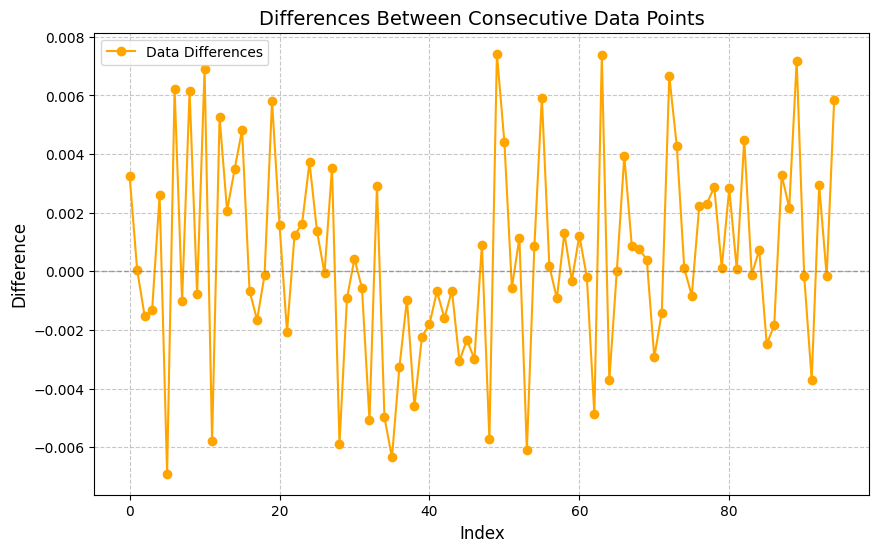

In [314]:
plot_consecutive_differences(distances)

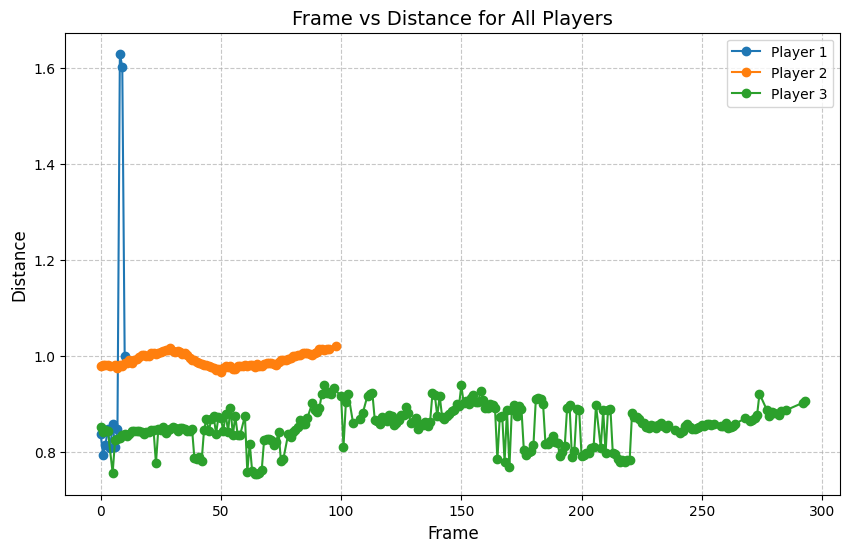

In [316]:
# Create the plot
plt.figure(figsize=(10, 6))

# Iterate over players and plot their data
for player_id, player_data in list(players.items())[:3]:
    distances = [data['distance'] for data in player_data]
    frames = [data['frame'] for data in player_data]
    plt.plot(frames, distances, marker='o', label=f'Player {player_id}')

# Add labels, title, and legend
plt.ylabel("Distance", fontsize=12)
plt.xlabel("Frame", fontsize=12)
plt.title("Frame vs Distance for All Players", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()  # Automatically creates a legend for all players
plt.show()

In [ ]:
count_patterns()